# Importing the libraries we are going to use:

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import copy

# #########################

# Reading the raw data and saving it in a variable called: df_algae

In [3]:
df_algae = pd.read_excel('data11.xls') # data11.xls is raw data!
print('**************  df_algae looks like:')
df_algae

**************  df_algae looks like:


,Season,Size,Speed,F1,F2,F3,F4,F5,F6,F7,F8,Algae 1,Algae 2,Algae 3,Algae 4,Algae 5,Algae 6,Algae 7
0,winter,small_,medium,8.00,9.80,60.800,6.238,578.00000,105.00000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35,8.00,57.750,1.288,370.00000,428.75000,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10,11.40,40.020,5.330,346.66699,125.66700,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07,4.80,77.364,2.302,98.18200,61.18200,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06,9.00,55.350,10.416,233.70000,58.22200,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
5,winter,small_,high__,8.25,13.10,65.750,9.248,430.00000,18.25000,56.66700,28.400,15.1,14.6,1.4,0.0,22.5,12.6,2.9
6,summer,small_,high__,8.15,10.30,73.250,1.535,110.00000,61.25000,111.75000,3.200,2.4,1.2,3.2,3.9,5.8,6.8,0.0
7,autumn,small_,high__,8.05,10.60,59.067,4.990,205.66701,44.66700,77.43400,6.900,18.2,1.6,0.0,0.0,5.5,8.7,0.0
8,winter,small_,medium,8.70,3.40,21.950,0.886,102.75000,36.30000,71.00000,5.544,25.4,5.4,2.5,0.0,0.0,0.0,0.0
9,winter,small_,high__,7.93,9.90,8.000,1.390,5.80000,27.25000,46.60000,0.800,17.0,0.0,0.0,2.9,0.0,0.0,1.7


# Basic info about the dataset:

In [4]:
df_algae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 18 columns):
Season     183 non-null object
Size       183 non-null object
Speed      183 non-null object
F1         182 non-null float64
F2         181 non-null float64
F3         173 non-null float64
F4         181 non-null float64
F5         181 non-null float64
F6         181 non-null float64
F7         181 non-null float64
F8         171 non-null float64
Algae 1    183 non-null float64
Algae 2    183 non-null float64
Algae 3    183 non-null float64
Algae 4    183 non-null float64
Algae 5    183 non-null float64
Algae 6    183 non-null float64
Algae 7    183 non-null float64
dtypes: float64(15), object(3)
memory usage: 25.8+ KB


# We have some null values which we should deal with; First, let's see where they are:

In [5]:
print(df_algae.isnull().sum())

Season      0
Size        0
Speed       0
F1          1
F2          2
F3         10
F4          2
F5          2
F6          2
F7          2
F8         12
Algae 1     0
Algae 2     0
Algae 3     0
Algae 4     0
Algae 5     0
Algae 6     0
Algae 7     0
dtype: int64


For example, in 12 rows, we do not have the value of F12

# A simple way, is jut to drop the rows with unknown values:

In [6]:
df_algae=df_algae.dropna()
df_algae.index = range(len(df_algae)) # this will index the rows again. Without this, the indexes will remain the same (The rows won't shift up)
print("We have", df_algae.isnull().values.sum(), " row(s) with unknown value now")

We have 0  row(s) with unknown value now


In [7]:
print('**************  df_algae, after removing the unknown rows, looks like:')
df_algae

**************  df_algae, after removing the unknown rows, looks like:


,Season,Size,Speed,F1,F2,F3,F4,F5,F6,F7,F8,Algae 1,Algae 2,Algae 3,Algae 4,Algae 5,Algae 6,Algae 7
0,winter,small_,medium,8.00,9.80,60.800,6.238,578.00000,105.00000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35,8.00,57.750,1.288,370.00000,428.75000,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10,11.40,40.020,5.330,346.66699,125.66700,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07,4.80,77.364,2.302,98.18200,61.18200,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06,9.00,55.350,10.416,233.70000,58.22200,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
5,winter,small_,high__,8.25,13.10,65.750,9.248,430.00000,18.25000,56.66700,28.400,15.1,14.6,1.4,0.0,22.5,12.6,2.9
6,summer,small_,high__,8.15,10.30,73.250,1.535,110.00000,61.25000,111.75000,3.200,2.4,1.2,3.2,3.9,5.8,6.8,0.0
7,autumn,small_,high__,8.05,10.60,59.067,4.990,205.66701,44.66700,77.43400,6.900,18.2,1.6,0.0,0.0,5.5,8.7,0.0
8,winter,small_,medium,8.70,3.40,21.950,0.886,102.75000,36.30000,71.00000,5.544,25.4,5.4,2.5,0.0,0.0,0.0,0.0
9,winter,small_,high__,7.93,9.90,8.000,1.390,5.80000,27.25000,46.60000,0.800,17.0,0.0,0.0,2.9,0.0,0.0,1.7


# Here, we copy the columns that have categorical data to a new variable called cat_df_algae:

In [8]:
cat_df_algae = df_algae.select_dtypes(include=['object']).copy()# object data type mens categorical data type
df_algae_fin = df_algae.copy()# Just to keep the data set we have safe! Not important!
print('**************  cat_df_algae looks like:')
cat_df_algae

**************  cat_df_algae looks like:


,Season,Size,Speed
0,winter,small_,medium
1,spring,small_,medium
2,autumn,small_,medium
3,spring,small_,medium
4,autumn,small_,medium
5,winter,small_,high__
6,summer,small_,high__
7,autumn,small_,high__
8,winter,small_,medium
9,winter,small_,high__


# Now, we start label binarizing for the first categorical feature (Size, the first section):

The following 3 sections are the same, each is related to one feature.

In [9]:
cat_df_algae_onehot_sklearn = cat_df_algae.copy() #Here, again I just copy the variable to keep it safe. 
from sklearn.preprocessing import LabelBinarizer # This is the function form Sklearn
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_algae_onehot_sklearn['Size'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
result_df = pd.concat([lb_results_df,df_algae], axis=1) # Here, I am attaching the generated labels to the data we had
res_1=result_df.copy()

In [10]:
cat_df_algae_onehot_sklearn = cat_df_algae.copy()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_algae_onehot_sklearn['Speed'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
result_df = pd.concat([lb_results_df,df_algae_fin], axis=1)
res_2=result_df.copy()
res_2 = pd.concat([lb_results_df,res_1], axis=1)

In [11]:
cat_df_algae_onehot_sklearn = cat_df_algae.copy()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_algae_onehot_sklearn['Season'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
result_df = pd.concat([lb_results_df,df_algae_fin], axis=1)
res_3=result_df.copy()
res = pd.concat([lb_results_df,res_2], axis=1)

# Finally, we drop the categorical data related columns and write the excel file:

In [12]:
res=res.drop(['Size', 'Season','Speed'], axis=1)
res.to_excel("polished_data.xls")

In [13]:
res.head()

,autumn,spring,summer,winter,high__,low___,medium,large_,medium,small_,...,F6,F7,F8,Algae 1,Algae 2,Algae 3,Algae 4,Algae 5,Algae 6,Algae 7
0,0,0,0,1,0,0,1,0,0,1,...,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,0,1,0,0,0,0,1,0,0,1,...,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,1,0,0,0,0,0,1,0,0,1,...,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,0,1,0,0,0,0,1,0,0,1,...,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,1,0,0,0,0,0,1,0,0,1,...,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


# Now we will do the same for the test data:

In [14]:
df_algae = pd.read_excel('eval_result_data.xls') #eval_result_data is the raw test data!
df_algae=df_algae.dropna()
df_algae.index = range(len(df_algae)) # this will index the rows again. Without this, the indexes will remain the same (The rows won't shift up)
print("We have", df_algae.isnull().values.sum(), " row(s) with unknown value now")
cat_df_algae = df_algae.select_dtypes(include=['object']).copy()# object data type mens categorical data type
df_algae_fin = df_algae.copy()# Just to keep the data set we have safe! Not important!
cat_df_algae_onehot_sklearn = cat_df_algae.copy() #Here, again I just copy the variable to keep it safe. 
from sklearn.preprocessing import LabelBinarizer # This is the function form Sklearn
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_algae_onehot_sklearn['Size'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
result_df = pd.concat([lb_results_df,df_algae], axis=1) # Here, I am attaching the generated labels to the data we had
res_1=result_df.copy()
cat_df_algae_onehot_sklearn = cat_df_algae.copy()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_algae_onehot_sklearn['Speed'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
result_df = pd.concat([lb_results_df,df_algae_fin], axis=1)
res_2=result_df.copy()
res_2 = pd.concat([lb_results_df,res_1], axis=1)
cat_df_algae_onehot_sklearn = cat_df_algae.copy()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_algae_onehot_sklearn['Season'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
result_df = pd.concat([lb_results_df,df_algae_fin], axis=1)
res_3=result_df.copy()
res = pd.concat([lb_results_df,res_2], axis=1)
res=res.drop(['Size', 'Season','Speed'], axis=1)
res.to_excel("polished_test_data.xls")

We have 0  row(s) with unknown value now


# END OF DATA POLISHING !
 ***********************************************************************************************

# Using Support Vector Regression method (sklearn library) :

In [15]:
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: pyplot.hold

TypeError: only integer scalar arrays can be converted to a scalar index

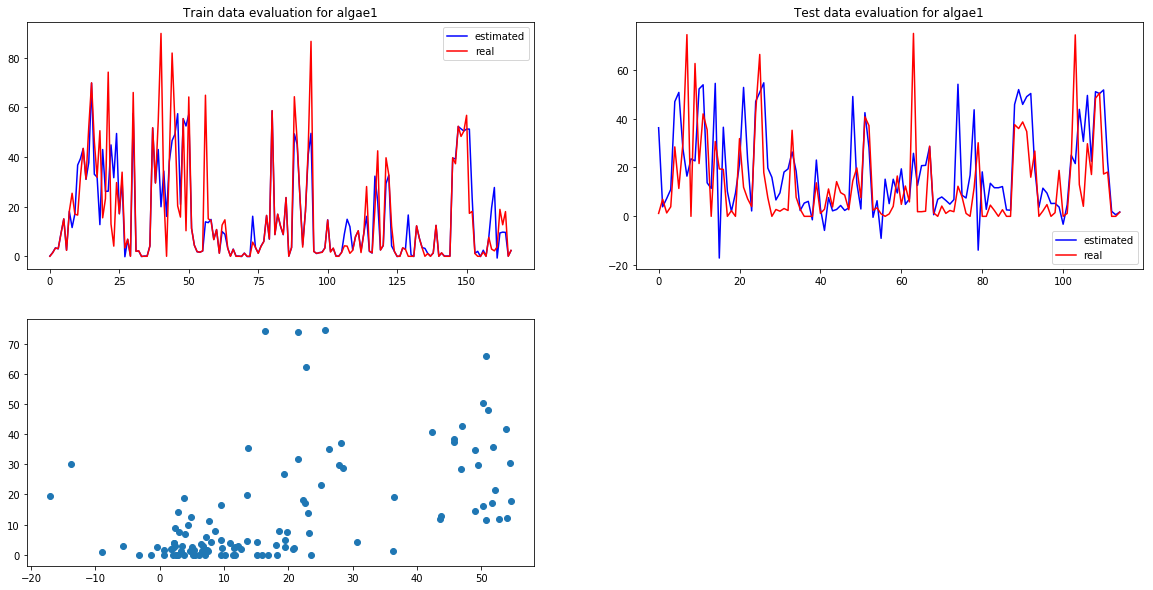

In [16]:
algae_type=['T','U','V','W','X','Y','Z'] # Defining the columns in a list in order to use it in the for loop
counter=0; # this counter is used to call each algae type (for the plots and other printing porpuses)
plt.rcParams['figure.figsize'] = [20, 10]
# In this context, y is the algae concentration and x is the features 
from sklearn.preprocessing import normalize
for i in algae_type: # this for loop will run for each algae type once 
    counter=counter+1
    xlsx_train = pd.ExcelFile('polished_data.xls') # reading the training dataset (we generated this before)
    xvalue = pd.read_excel(xlsx_train,0, usecols="B:S")
    yvalue= pd.read_excel(xlsx_train,0, usecols=i) 
    xtrain = xvalue.values
    ytrain = yvalue.values
    xlsxtest = pd.ExcelFile('polished_test_data.xls') #reading the test data set (we generated this before)
    xeval=pd.read_excel(xlsxtest,0, usecols="B:S")
    yeval=pd.read_excel(xlsxtest,0, usecols=i)
    xtest=xeval.values
    ytest=yeval.values
    
    svr_rbf = SVR(kernel='rbf', C=500, gamma=.0001) # defining the model. There is no way to decide the values analytically 
    y_rbf = svr_rbf.fit(xtrain, ytrain).predict(xtrain) # Estimating the y value used in training. Here we want to see if the model fit even the training data or not.
    y_rbf_eval = svr_rbf.fit(xtrain,ytrain).predict(xtest) #Estimating y values using our x in the test dataset. 
    
    plt.figure(counter)
    plt.subplot(2, 2, 1)
    plt.plot(y_rbf,'b', label="estimated")
    plt.hold(True) 
    plt.plot(ytrain,'r', label="real")
    plt.legend()
    textt='Train data evaluation for algae'+str(counter)
    plt.title(textt)
    plt.subplot(2, 2, 2)
    plt.plot(y_rbf_eval,'b',label="estimated")
    plt.hold(True) 
    plt.plot(ytest,'r',label="real")
    plt.legend()
    textt='Test data evaluation for algae'+str(counter)
    plt.title(textt)
    plt.subplot(2, 2, 3)
    plt.scatter(y_rbf_eval,ytest)
    plt.hold(True) 
    a=range(max(ytest))
    plt.plot(a)
    textt='Predicted data vs Real data for algae'+str(counter)
    plt.title(textt)
    #To evaluate, I used normalized squared error value as it was used in the project (http://rstudio-pubs-static.s3.amazonaws.com/146279_4ee556bf205946dfb29d029c4e463557.html)in the very end!
    # This is how NMSE is being calculated in R 
    yteset_normalized=normalize(ytest) 
    y_rbf_eval_normalized=normalize(y_rbf_eval.reshape(-1, 1))
    print("Normalized Mean Squared Error Value for algae", counter, "is" , mean_squared_error(yteset_normalized,y_rbf_eval_normalized))
    